In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
#data cleaning and merging
read_measurement=pd.read_csv('Resources/hawaii_measurements.csv')
read_stations=pd.read_csv('Resources/hawaii_stations.csv')
read_measurement=read_measurement.dropna(how='any')
merged_df=read_measurement.merge(read_stations, on='station', how='outer')
#merged_df.to_csv('Resources/updated_data.csv')

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
inspector = inspect(engine)
columns_station = inspector.get_columns('Station')
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
columns_measurement = inspector.get_columns('Measurement')
for column in columns_measurement:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and 
# plot the results
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date=dt.datetime.strptime(latest_date, '%Y-%m-%d')
earliest_date=latest_date-dt.timedelta(days=365)

results_precipitation_last12months=session.query(Measurement.date, func.avg(Measurement.prcp)).\
                                    filter(Measurement.date>=earliest_date).\
                                    group_by(Measurement.date).order_by(Measurement.date.desc()).all()
results_precipitation_last12months

[('2017-08-23', 0.1325),
 ('2017-08-22', 0.16666666666666666),
 ('2017-08-21', 0.19333333333333336),
 ('2017-08-20', 0.005),
 ('2017-08-19', 0.03),
 ('2017-08-18', 0.02),
 ('2017-08-17', 0.0475),
 ('2017-08-16', 0.1525),
 ('2017-08-15', 0.164),
 ('2017-08-14', 0.062),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.04666666666666667),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0175),
 ('2017-08-09', 0.049999999999999996),
 ('2017-08-08', 0.11000000000000001),
 ('2017-08-07', 0.0125),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.03),
 ('2017-08-04', 0.015),
 ('2017-08-03', 0.017499999999999998),
 ('2017-08-02', 0.075),
 ('2017-08-01', 0.04666666666666666),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.06),
 ('2017-07-29', 0.10166666666666667),
 ('2017-07-28', 0.11),
 ('2017-07-27', 0.0016666666666666668),
 ('2017-07-26', 0.08333333333333333),
 ('2017-07-25', 0.08714285714285715),
 ('2017-07-24', 0.6539999999999999),
 ('2017-07-23', 0.22600000000000003),
 ('2017-07-22', 0.7366666666666667),
 ('2017-07-21', 0.

In [14]:
#Precipitation data by month
results_precipitation_bymonth=session.query(func.strftime("%m",Measurement.date), func.avg(Measurement.prcp)).\
                                    filter(Measurement.date>=earliest_date).\
                                    group_by(func.strftime("%m",Measurement.date)).order_by(func.strftime("%m",Measurement.date).asc()).all()
results_precipitation_bymonth

[('01', 0.07029411764705881),
 ('02', 0.24111111111111108),
 ('03', 0.17526627218934915),
 ('04', 0.32111111111111107),
 ('05', 0.15131736526946113),
 ('06', 0.11999999999999998),
 ('07', 0.13477272727272727),
 ('08', 0.18187499999999995),
 ('09', 0.285549132947977),
 ('10', 0.12162011173184357),
 ('11', 0.12023391812865496),
 ('12', 0.19949438202247183)]

In [15]:
# Calculate the date 1 year ago from the last data point in the database
earliest_date
# Save the query results as a Pandas DataFrame and set the index to the 
# date column
df=pd.DataFrame(results_precipitation_last12months, columns=['Date', 'Precipitation']).set_index('Date')
# Sort the dataframe by date
df=df.sort_values('Date', ascending=True)
df


,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


<function matplotlib.pyplot.show(*args, **kw)>

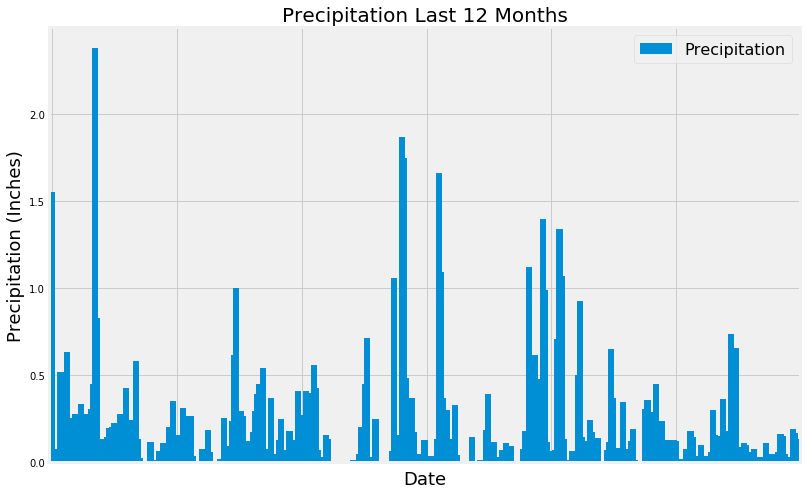

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
ax=df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.legend(fontsize="16", loc="upper right")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.show

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [18]:
# Design a query to show how many stations are available in this dataset?
stations=session.query(func.count(Measurement.station.distinct())).all()
stations

[(9)]

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).first()
active_stations

('USC00519281', 2772)

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_station_temp=session.query(Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
        filter(Measurement.station=='USC00519281').group_by(Measurement.station).all()
active_station_temp

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(*args, **kw)>

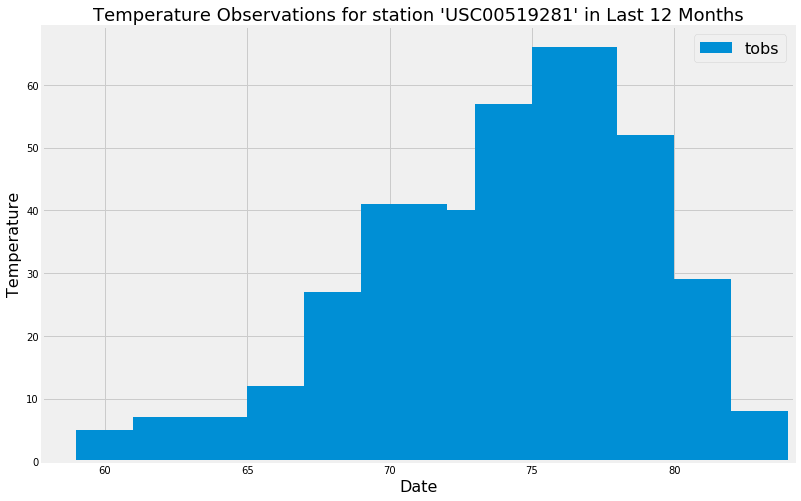

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp=session.query(Measurement.station,func.count(Measurement.tobs)).\
                                group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
temp
temp_last12months=session.query(Measurement.date, Measurement.tobs).\
                                    filter(Measurement.date>=earliest_date).filter(Measurement.station=='USC00519281').\
                                    group_by(Measurement.date).order_by(Measurement.date.desc()).all()
df_temp_last12months=pd.DataFrame(temp_last12months)
df_temp_last12months.plot.hist(bins=12,width=3, figsize=(12,8))
plt.legend(fontsize="16", loc="upper right")
plt.title("Temperature Observations for station 'USC00519281' in Last 12 Months", size=18)
plt.ylabel("Temperature", size=16)
plt.xlabel("Date", size=16)
plt.show

## Bonus Challenge Assignment

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
#June results
june=calc_temps('2016-06-01','2016-06-30')
june

[(64.0, 75.17525773195877, 81.0)]

In [24]:
#December results
december=calc_temps('2016-12-01','2016-12-31')
december

[(60.0, 71.13, 78.0)]

In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
startd='2017-06-05'
endd='2017-06-15'
vacation=calc_temps(startd,endd)
vacation

[(72.0, 77.21917808219177, 83.0)]

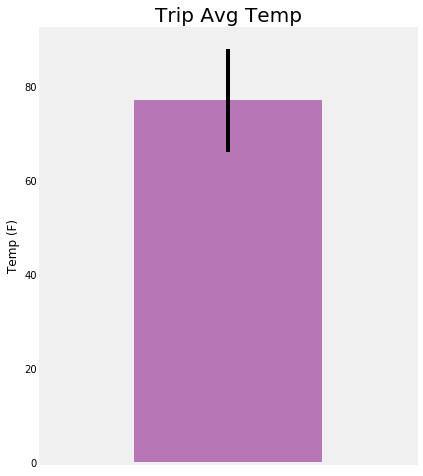

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
vacation_df = pd.DataFrame(vacation, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = vacation_df['Avg Temp']
min_max_temp = vacation_df.iloc[0]['Max Temp'] - vacation_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='purple')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.show()

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
vac_df=merged_df.loc[(merged_df.date<='2017-06-15') & (merged_df.date>='2017-06-05')]
vac_df.groupby(['station', 'name','latitude','longitude','elevation'])['prcp'].sum().sort_values(ascending=False)



station      name                                    latitude  longitude   elevation
USC00516128  MANOA LYON ARBO 785.2, HI US            21.33310  -157.80250  152.4        4.68
USC00519281  WAIHEE 837.5, HI US                     21.45167  -157.84889  32.9         2.68
USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130  -157.83740  7.0          1.66
USC00513117  KANEOHE 838.1, HI US                    21.42340  -157.80150  14.6         1.48
USC00519523  WAIMANALO EXPERIMENTAL FARM, HI US      21.33556  -157.71139  19.5         0.61
USC00519397  WAIKIKI 717.2, HI US                    21.27160  -157.81680  3.0          0.14
Name: prcp, dtype: float64

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

vac_dates=session.query(func.strftime("%m-%d",Measurement.date).label('Date')).\
                                    filter(Measurement.date>='2017-06-05').filter(Measurement.date<='2017-06-15').\
                                    group_by('Date').all()
norm_dates=[]
for t in vac_dates: 
    for x in t: 
       norm_dates.append(x) 

list=[]
for i in norm_dates:
    dn=daily_normals(i)
    list.append(dn)

normals = [] 
for t in list: 
    for x in t: 
        normals.append(x) 


['06-05',
 '06-06',
 '06-07',
 '06-08',
 '06-09',
 '06-10',
 '06-11',
 '06-12',
 '06-13',
 '06-14',
 '06-15']

In [43]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df=pd.DataFrame(normals, columns=['min','avg','max'], index=norm_dates)
normals_df.index.name = "Vacation Date"
normals_df

,min,avg,max
Vacation Date,,,
06-05,68.0,74.854545,81.0
06-06,70.0,75.175439,80.0
06-07,68.0,75.071429,81.0
06-08,70.0,75.586207,81.0
06-09,69.0,75.152542,81.0
06-10,68.0,75.142857,81.0
06-11,69.0,76.019608,84.0
06-12,66.0,75.666667,83.0
06-13,68.0,75.666667,81.0


Text(0.5, 1.0, 'Temperature by Dates')

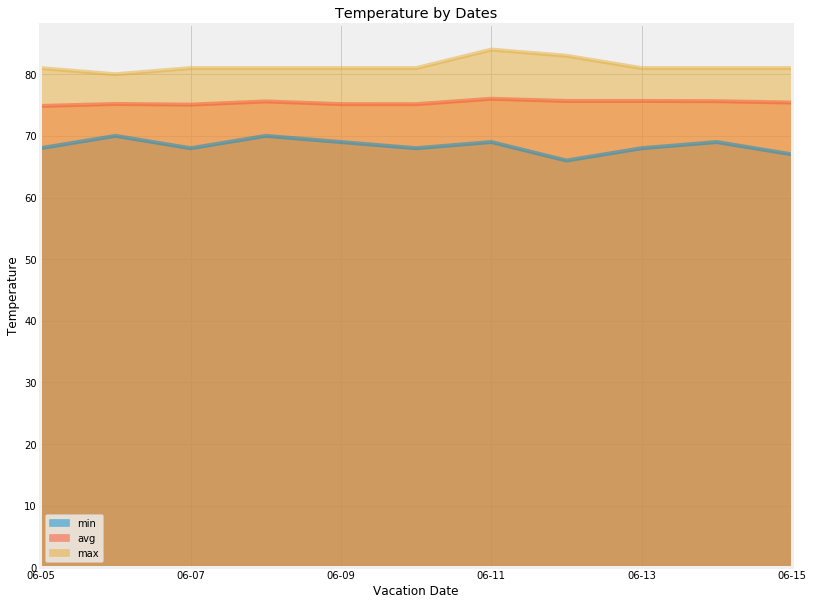

In [53]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot(kind='area',figsize=(12, 10),stacked=False)
plt.ylabel('Temperature')
plt.title('Temperature by Dates')